In [17]:
import numpy as np

# Задание 1.
# Подсчитать произведение ненулевых элементов на диагонали прямоугольной матрицы. 

arr_py = [[1, 0, 1], [2, 0, 2], [3, 0, 3], [4, 4, 4]]
arr_np = np.array(arr_py)

def diag_prod_py(arr_py):
    product = 1
    for i in range(len(arr_py[0])):
        elem = arr_py[i][i]
        if elem:
            product *= elem
    return product

def diag_prod_np(arr_np):
    diag = np.diagonal(arr_np)
    return np.prod(diag[diag != 0])

print('Python:', diag_prod_py(arr_py))
print('Time: ', end='')
%timeit diag_prod_py(arr_py)
print('NumPy:', diag_prod_np(arr_np))
print('Time: ', end='')
%timeit diag_prod_np(arr_np)

Python: 3
Time: 806 ns ± 147 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)
NumPy: 3
Time: 8.27 µs ± 236 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [18]:
# Задание 2: Построить вектор np.array([X[i[0], j[0]], X[i[1], j[1]], . . . , X[i[N-1], j[N-1]]]).

x_py = [[9, 4, 2], [6, 0, 0], [9, 9, 3]]
i_py = [1, 2, 1]
j_py = [1, 0, 1]

x_np = np.array(x_py)
i_np = np.array(i_py)
j_np = np.array(j_py)

def vector_build_py(x_py, i_py, j_py):
    vector = []
    for k in range(len(i_py)):
        vector.append(x_py[i_py[k]][j_py[k]])
    return vector

def vector_build_np(x_np, i_np, j_np):
    return x_np[i_np, j_np]

print('Python:', vector_build_py(x_py, i_py, j_py))
print('Time: ', end='')
%timeit vector_build_py(x_py, i_py, j_py)
print('NumPy:', vector_build_np(x_np, i_np, j_np))
print('Time: ', end='')
%timeit vector_build_np(x_np, i_np, j_np)

Python: [0, 9, 0]
Time: 849 ns ± 34.8 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)
NumPy: [0 9 0]
Time: 1.28 µs ± 78.8 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [19]:
# Задание 3. Даны два вектора x и y. Проверить, задают ли они одно и то же мультимножество. 

x_py = [1, 2, 2, 4]
y_py = [4, 2, 1, 2]

x_np = np.array(x_py)
y_np = np.array(y_py)

def is_same_set_py(x_py, y_py):
    return sorted(x_py) == sorted(y_py)

def is_same_set_np(x_np, y_np):
    return np.array_equal(np.bincount(x_np), np.bincount(y_np))

print('Python:', is_same_set_py(x_py, y_py))
print('Time: ', end='')
%timeit is_same_set_py(x_py, y_py)
print('NumPy:', is_same_set_np(x_np, y_np))
print('Time: ', end='')
%timeit is_same_set_np(x_np, y_np)

Python: True
Time: 736 ns ± 38.6 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)
NumPy: True
Time: 6.26 µs ± 145 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [20]:
# Задание 4. Найти максимальный элемент в векторе x среди элементов, перед которыми стоит нулевой. 

x_py = [6, 2, 0, 3, 0, 0, 5, 7, 0]
x_np = np.array(x_py)

def find_max_py(x_py):
    max_num = -1
    for i in range(1, len(x_py)):
        if x_py[i - 1] == 0 and x_py[i] > max_num:
            max_num = x_py[i]
    return max_num

def find_max_np(x_np):
    zeroes = x_np == 0
    return x_np[1:][zeroes[:-1]].max()

print('Python:', find_max_py(x_py))
print('Time: ', end='')
%timeit find_max_py(x_py)
print('NumPy:', find_max_np(x_np))
print('Time: ', end='')
%timeit find_max_np(x_np)

Python: 5
Time: 1.04 µs ± 34.8 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)
NumPy: 5
Time: 4.92 µs ± 131 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


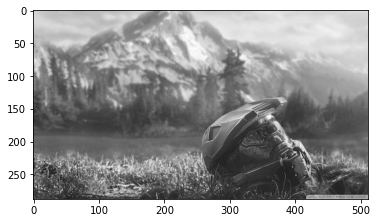

Python: 87.8 ms ± 6.02 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
NumPy: 4.98 ms ± 123 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [15]:
# Задание 5 Дано изображение task5.png, вернуть его же, но в сером диапазоне

import matplotlib.pyplot as plt

photo = plt.imread('task5.png')
photo_py = photo.tolist()
photo_np = np.array(photo_py)
rgb_ration_py = [0.299, 0.587, 0.114]
rgb_ration_np = np.array(rgb_ration_py)

def to_gray_py(photo_py, rgb_ration_py):
    res = []
    for h in photo_py:
        new_width = []
        for w in h:
            color = 0
            for i in range(3):
                color = w[i] * rgb_ration_py[i]
            new_width.append(color)
        res.append(new_width)
    return res

def to_gray_np(photo_np, rgb_ration_np):
    return np.dot(photo_np[...,:3], rgb_ration_np)

arr = to_gray_py(photo_py, rgb_ration_py)
plt.imshow(arr, cmap='gray')
plt.show()

print('Python:', end=' ')
%timeit to_gray_py(photo_py, rgb_ration_py)
print('NumPy:', end=' ')
%timeit to_gray_np(photo_np, rgb_ration_np)

In [22]:
# Задание 6. Реализовать кодирование длин серий

from collections import Counter

x_py = [2, 2, 2, 3, 3, 3, 5]
x_np = np.array(x_py)

def RLE_py(x_py):
    return tuple(zip(*Counter(x_py).items()))

def RLE_np(x_np):
    bin_count = np.bincount(x_np)
    non_zero = np.nonzero(bin_count)[0]
    return non_zero, bin_count[non_zero]

print('Python:', RLE_py(x_py))
print('Time: ', end='')
%timeit RLE_py(x_py)
print('NumPy:', RLE_np(x_np))
print('Time: ', end='')
%timeit RLE_np(x_np)

Python: ((2, 3, 5), (3, 3, 1))
Time: 4.75 µs ± 215 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
NumPy: (array([2, 3, 5]), array([3, 3, 1]))
Time: 2.88 µs ± 223 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [29]:
# Задание 7. Вычислить матрицу евклидовых расстояний (норму) расстояний между соот. объектами

import scipy

x_py = [2, 7, 6, 6, 9, 6, 3, 4, 9]
y_py = [1, 0, 0, 7, 2, 2, 4, 3, 0]

x_np = np.array(x_py)
y_np = np.array(y_py)

def euclid_py(x_py, y_py):
    return (sum((x - y) ** 2 for x, y in zip(x_py, y_py)))**0.5

def euclid_np(x_np, y_np):
    return np.linalg.norm(x_np - y_np)

print('Python:', euclid_py(x_py, y_py))
print('Time: ', end='')
%timeit euclid_py(x_py, y_py)
print('NumPy:', euclid_np(x_np, y_np))
print('Time: ', end='')
%timeit euclid_np(x_np, y_np)
print("Scipy:", scipy.spatial.distance.euclidean(x_py, y_py))
print('Time: ', end='')
%timeit scipy.spatial.distance.euclidean(x_py, y_py)

Python: 15.329709716755891
Time: 3.59 µs ± 193 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
NumPy: 15.329709716755891
Time: 6.89 µs ± 427 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
Scipy: 15.329709716755891
Time: 20.5 µs ± 1.23 µs per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [39]:
# Задание 8. Реализовать функцию вычисления логарифма плотности многомерного нормального распределения.

import math
import scipy.stats

sigma = np.matrix([[2.3,   0,   0, 0],
                   [  0, 1.5,   0, 0],
                   [  0,   0, 1.7, 0],
                   [  0,   0,   0, 2]])
mu = np.array([2, 3, 8, 10])
x = np.array([2.1, 3.5, 8, 9.5])

def norm_pdf(x, mu, sigma):
    size = len(x)
    if size == len(mu) and (size, size) == sigma.shape:
        det = np.linalg.det(sigma)
        norm_const = 1.0/ ( math.pow((2*math.pi),float(size)/2) * math.pow(det,1.0/2) )
        x_mu = np.matrix(x - mu)
        inv = sigma.I        
        result = math.pow(math.e, -0.5 * (x_mu * inv * x_mu.T))
        return norm_const * result

print("Python:", norm_pdf(x, mu, sigma))
print('Time: ', end='')
%timeit norm_pdf(x, mu, sigma)
print("Scipy:", scipy.stats.multivariate_normal(mu, sigma).pdf(x))
print('Time: ', end='')
%timeit scipy.stats.multivariate_normal(mu, sigma).pdf(x)

Python: 0.006378411393413104
Time: 469 µs ± 42.3 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
Scipy: 0.006378411393413108
Time: 346 µs ± 15.7 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
